## The purpose of this file
Make an aggregate adjacency matrix and save it.
> Be sure to add $\tau$ (the number of snapshots you make) to the filename.

In [1]:
import sys
sys.path.append('../')
import powerlaw
import pandas as pd
import networkx as nx
import toolbox as tb
%matplotlib inline

In [2]:
tag = "starbucks"
hashtag = "スターバックス"
timespan = "21-29"
file = f"../data/datasets/{tag}/{tag}_{timespan}.pkl"
df = tb.get_dataframe(hashtag, file)

In [3]:
start = "2022-11-22T00:00+09:00"
end = "2022-11-26T23:59+09:00"
timespan = "22-26"
start = pd.to_datetime(start)
end = pd.to_datetime(end)
DF = df[(start <= df.index) & (df.index <= end)]

DF = df.copy()

In [4]:
tau, snapshots = tb.get_snapshots_closed_intervals(DF, 'minutes=30')
#tau, snapshots = tb.get_snapshots_closed_intervals(DF, 'hours=1')
print(f"tau = {tau}")

tau = 234


In [5]:
edgelst_of_snapshots = tb.get_edgelist_of_eachsnapshot(df,tau, snapshots)
filename = f'../data/graph_data/{tag}/original/{hashtag}_{timespan}_{tau}_aam'
print(filename)
#G = tb.make_aggregate_adjacency_matrix(edgelst_of_snapshots, fname=filename)
G = tb.make_aggregate_adjacency_matrix(edgelst_of_snapshots)

../data/graph_data/starbucks/original/スターバックス_22-26_234_aam


In [6]:
G.number_of_nodes()

20330

In [ ]:
tb.check_degree(G)

In [ ]:
tb.plot_dd(G, 20)

In [ ]:
tb.fit_power_law(G)

In [ ]:
tb.compare_distribution(G,"power_law", "exponential")

In [ ]:
tb.compare_distribution(G,"power_law", "lognormal")

In [ ]:
tb.plot_pdf_ccdf(G, Pcolor="#FF7A72", Ccolor="#6AC4BA")

The following is for when the network created during the entire period is too large to draw the degree distribution (`3_modified_aam.ipynb`) due to lack of memory.

In [7]:
#G.remove_node(hashtag)
G.remove_nodes_from([hashtag, "スタバ"])
print(f"Isolates after removal of the searchtag: \n{list(nx.isolates(G))}")
print("These isolate nodes are to be removed.")
G.remove_nodes_from(list(nx.isolates(G)))
assert len(list(nx.isolates(G))) == 0, "There is at least one isolate node left."
print("============================================")
print("The isolate nodes were successfully deleted.")

Isolates after removal of the searchtag: 
['うさぎと暮らす', 'misakiicafe', '羽田空港第一ターミナル', 'てぃあらさんと繋がりたい', '同窓会', 'ダークモカチップフラペチーノ🍫\u2061', 'コーヒー牛乳戻ってこないかな', 'シェケラートフレッド', 'spiralgirl', '岐阜タンメン半チャンセット', 'カウンター', '住友林業の平屋', '遠くとも一度は詣れ善光寺', 'OLごはん', 'スターバックスドライブスルー', 'クリスピークリームドーナツ', 'flairespresso', 'ストロベリー何とか', '名古屋則武新町2階店', 'あゆゆのイラスト', '木のかたまり', 'スタバのメッセージ', '妊活中', '愛宕グリーンヒルズ', '神対応', 'rkt_boom', '田町駅', 'スタバめぐり', '二子玉川公園', '猫舌でやけどしたけどネ', '珍事件', 'グラインダーブラシ', 'latelier']
These isolate nodes are to be removed.
The isolate nodes were successfully deleted.


In [ ]:
tb.check_degree(G)

In [ ]:
tb.fit_power_law(G)

In [ ]:
tb.compare_distribution(G,"power_law", "exponential")

In [ ]:
tb.compare_distribution(G,"power_law", "lognormal")

In [8]:
# Save figure for future use
fname1 = f"../data/figure/degree_distribution/pdfccdf1_{tag}_{timespan}_{tau}.pdf"
fname2 = f"../data/figure/degree_distribution/pdfccdf2_{tag}_{timespan}_{tau}.pdf"
print(fname1)
print(fname2)

../data/figure/degree_distribution/pdfccdf1_starbucks_22-26_234.pdf
../data/figure/degree_distribution/pdfccdf2_starbucks_22-26_234.pdf


Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.5101075407295976, 
its standard error sigma: 0.04590862080787175, 
k_min: 89.0


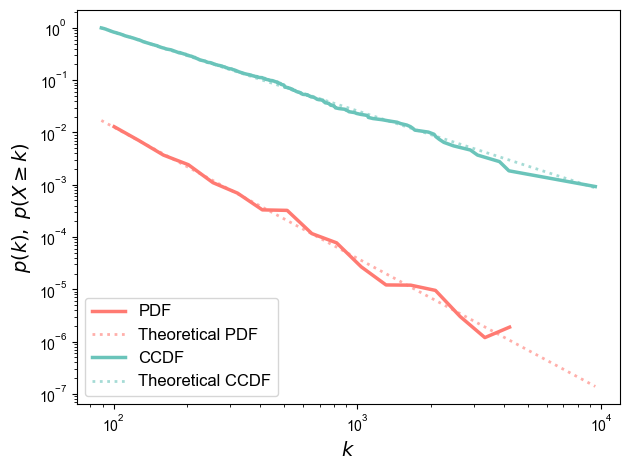

In [9]:
tb.plot_pdf_ccdf(G, Pcolor="#FF7A72", Ccolor="#6AC4BA")
#tb.plot_pdf_ccdf(G, Pcolor="#FF7A72", Ccolor="#6AC4BA", fname=fname1)

Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.5101075407295976, 
its standard error sigma: 0.04590862080787175, 
k_min: 89.0


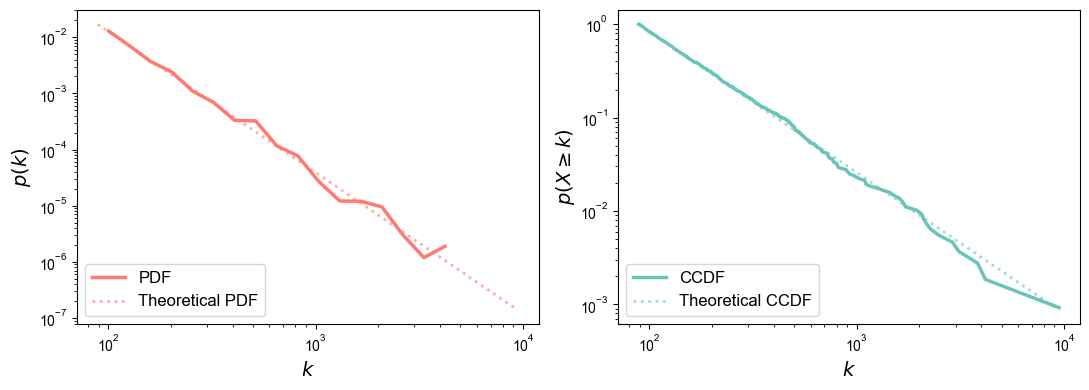

In [10]:
#tb.plot_pdf_ccdf(G, sep=True, Pcolor="#FF7A72", Ccolor="#6AC4BA")
tb.plot_pdf_ccdf(G, sep=True, Pcolor="#FF7A72", Ccolor="#6AC4BA", fname=fname2)

In [11]:
# Save modified aam for statistical test
nx.write_graphml(G, f'../data/graph_data/{tag}/modified/{hashtag}_{timespan}_{tau}_mdaam.graphml', encoding='utf-8')